<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/Oct_analysis_(DM)_pre_n_post_dialysis_IOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn
import openpyxl

In [2]:
df = openpyxl.load_workbook('/content/drive/MyDrive/OCT analysis original dataset in hemodialysis patients thesis Dr Poojitha.xlsx')
df.sheetnames

['Patient-control demo (CKD-DM)',
 'Patient-control demo (CKD-HTN)',
 'Pre+post HD-VA,IOP,CCT-DM',
 'Pre+post HD-VA,IOP,CCT-HTN',
 'Pre+post HD-RNFL-DM',
 'Pre+post HD-CMT-DM',
 'Pre+post HD-VFA-DM',
 'Pre+post HD-RNFL-HTN',
 'Pre+post HD-CMT-HTN',
 'Pre+post HD-VFA-HTN']

In [3]:
iopdm = pd.read_excel('/content/drive/MyDrive/OCT analysis original dataset in hemodialysis patients thesis Dr Poojitha.xlsx', sheet_name='Pre+post HD-VA,IOP,CCT-DM')
iopdm.columns

Index(['Pre HD BCVA-DM', 'Denominator', 'Numerator', 'Logmar', 'Pre HD IOP-DM',
       'Pre HD CCT-DM', 'Post HD 1 wk BCVA-DM', 'Denominator.1', 'Numerator.1',
       'Logmar.1', 'Post HD 1 wk IOP-DM', 'Post HD 1 wk CCT-DM',
       'Post HD 4 wk BCVA-DM', 'Denominator.2', 'Numerator.2', 'Logmar.2',
       'Post HD 4 wk IOP-DM', 'Post HD 4 wk CCT-DM', 'BCVA-DM-Control',
       'Denominator.3', 'Numerator.3', 'Logmar.3', 'IOP-DM-Control',
       'CCT-DM-Control'],
      dtype='object')

In [6]:
iop_dm = iopdm.drop(['Pre HD BCVA-DM', 'Denominator', 'Numerator', 'Logmar',
       'Pre HD CCT-DM', 'Post HD 1 wk BCVA-DM', 'Denominator.1', 'Numerator.1',
       'Logmar.1', 'Post HD 1 wk CCT-DM',
       'Post HD 4 wk BCVA-DM', 'Denominator.2', 'Numerator.2', 'Logmar.2',
        'Post HD 4 wk CCT-DM', 'BCVA-DM-Control',
       'Denominator.3', 'Numerator.3', 'Logmar.3',
       'CCT-DM-Control'], axis=1)
iop_dm.columns


Index(['Pre HD IOP-DM', 'Post HD 1 wk IOP-DM', 'Post HD 4 wk IOP-DM',
       'IOP-DM-Control'],
      dtype='object')

In [7]:
iop_dm.describe()

,Pre HD IOP-DM,Post HD 1 wk IOP-DM,Post HD 4 wk IOP-DM,IOP-DM-Control
count,30.000000,30.000000,30.000000,30.000000
mean,17.000000,17.033333,15.966667,14.866667
std,3.184012,2.413801,2.747831,3.729966
min,12.000000,12.000000,11.000000,11.000000
25%,14.250000,17.000000,14.000000,12.000000
50%,17.000000,17.000000,16.000000,14.000000
75%,18.750000,17.750000,18.000000,16.000000
max,26.000000,23.000000,22.000000,26.000000


In [8]:
iop_dm.corr()

,Pre HD IOP-DM,Post HD 1 wk IOP-DM,Post HD 4 wk IOP-DM,IOP-DM-Control
Pre HD IOP-DM,1.000000,0.856957,0.945907,0.098719
Post HD 1 wk IOP-DM,0.856957,1.000000,0.831995,0.352868
Post HD 4 wk IOP-DM,0.945907,0.831995,1.000000,0.174500
IOP-DM-Control,0.098719,0.352868,0.174500,1.000000


<Axes: >

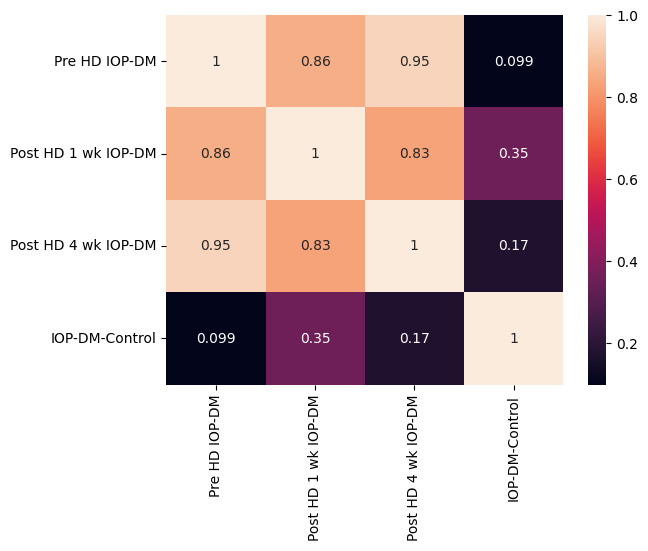

In [10]:
seaborn.heatmap(iop_dm.corr(), annot=True)

array([[<Axes: title={'center': 'Pre HD IOP-DM'}>,
        <Axes: title={'center': 'Post HD 1 wk IOP-DM'}>],
       [<Axes: title={'center': 'Post HD 4 wk IOP-DM'}>,
        <Axes: title={'center': 'IOP-DM-Control'}>]], dtype=object)

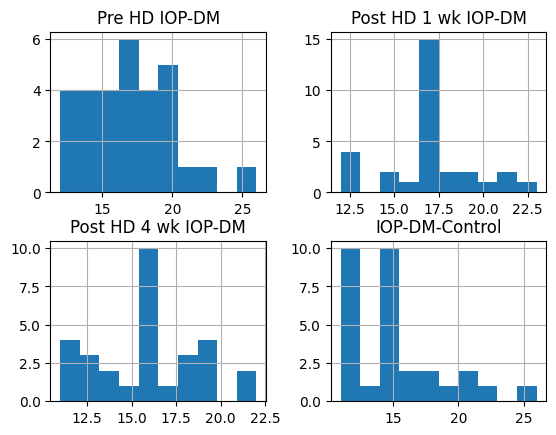

In [12]:
iop_dm.hist()

<Axes: >

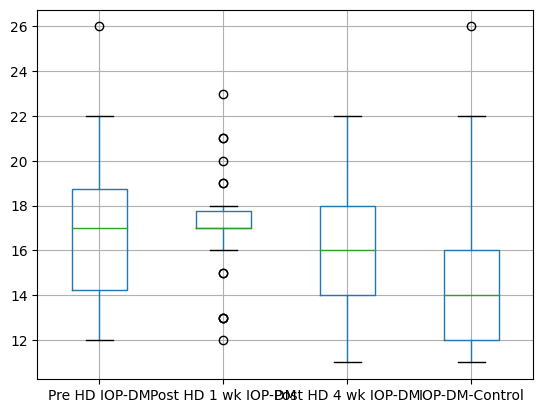

In [13]:
iop_dm.boxplot()

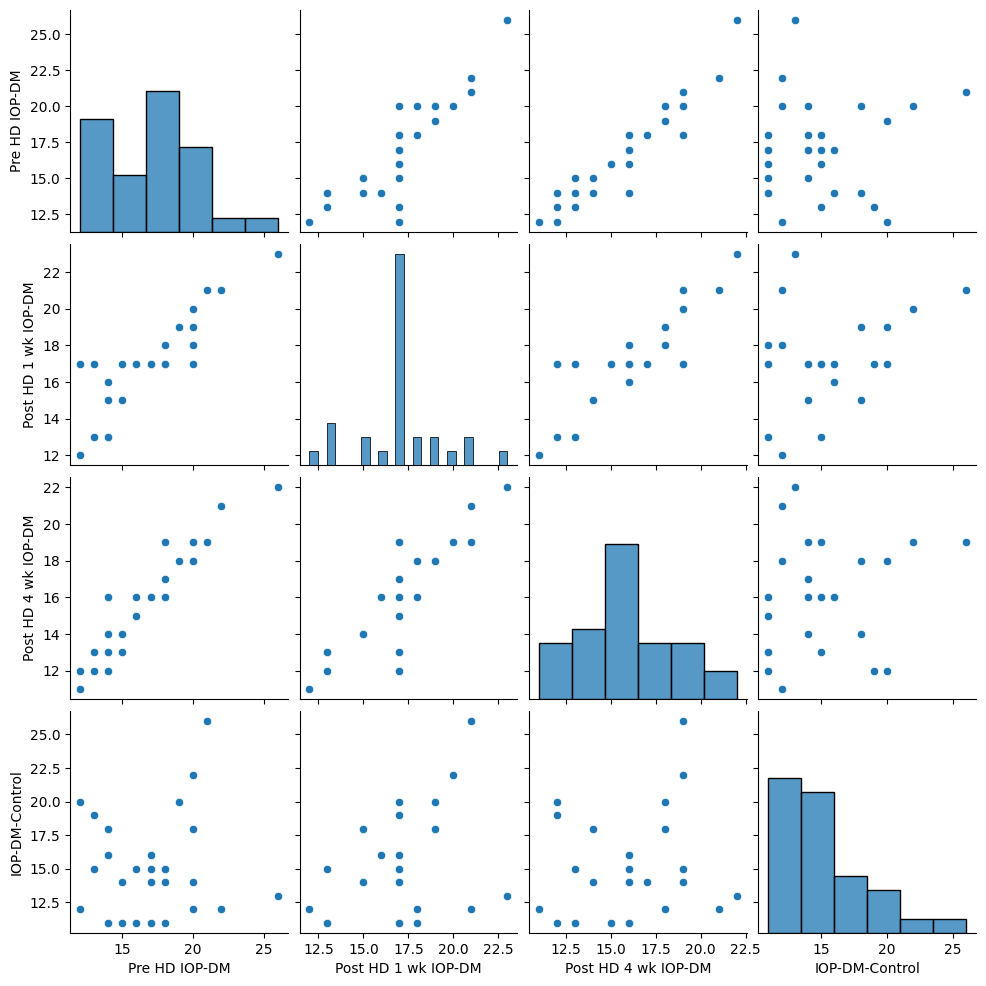

In [14]:
seaborn.pairplot(iop_dm)

<Axes: >

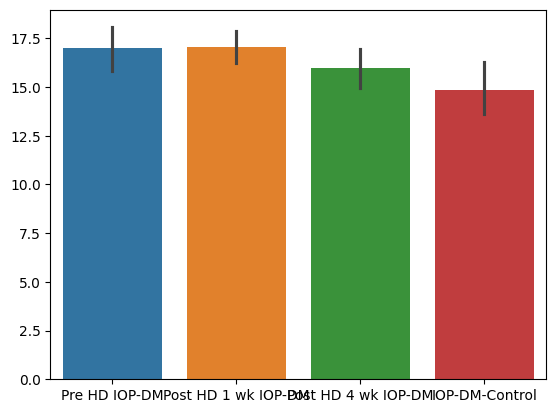

In [15]:
seaborn.barplot(iop_dm)

<Axes: >

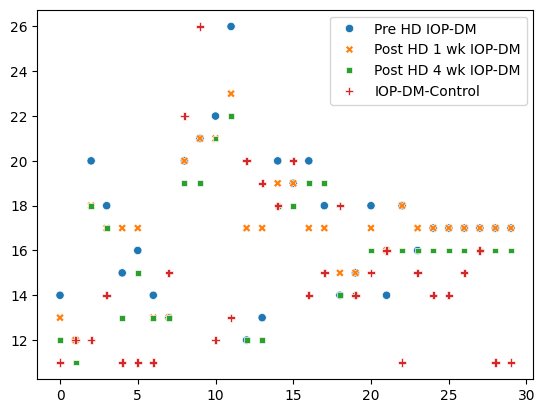

In [16]:
seaborn.scatterplot(iop_dm)

<ipython-input-17-efc8f39b4d58>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(iop_dm)


<Axes: ylabel='Density'>

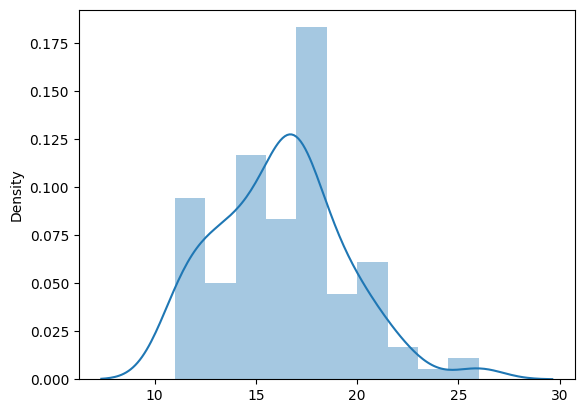

In [17]:
seaborn.distplot(iop_dm)

<Axes: ylabel='Density'>

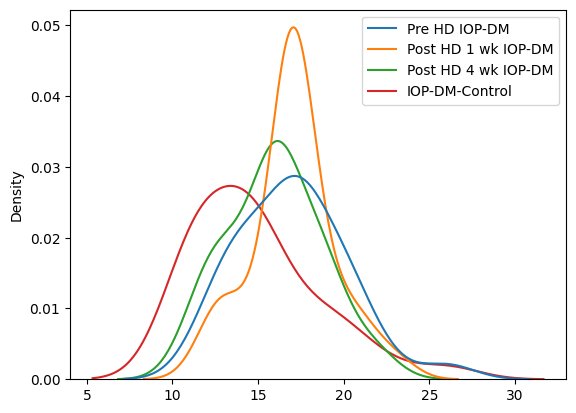

In [18]:
seaborn.kdeplot(iop_dm)

In [20]:
from scipy import stats

# Assuming your 'Pre HD logMAR-DM' and 'Post HD 1 wk logMAR-DM' columns are in the DataFrame 'vision_dm'
pre_iop = iop_dm['Pre HD IOP-DM']
post_iop = iop_dm['Post HD 1 wk IOP-DM']

# Perform the t-test
t_statistic, p_value = stats.ttest_rel(pre_iop, post_iop)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.10926604951199244
P-value: 0.9137440636558987


In [19]:
iop_dm.columns

Index(['Pre HD IOP-DM', 'Post HD 1 wk IOP-DM', 'Post HD 4 wk IOP-DM',
       'IOP-DM-Control'],
      dtype='object')